# FE Stats Character Analysis

### A notebook to showcase the distributions of stat lines for the following characters
- #### ***Marth***
- #### ***Linde***
- #### ***Palla***
- #### ***Alm***
- #### ***Roy***
- #### ***Lilina***
- #### ***Claude***
- #### ***Lysithea***

### For each character, the following considerations are applied regarding data collection
- #### *Analysis based on comparison with character with most amount of appearances (provided stats are comparable) and stat disribution (in %) after normalizing data and averaging*
- #### *Use base stats from joining time*
- #### *Include DLC and other means outside of strict base game availability*
- #### *No spin-offs (except FEH)*
- #### *Do not include seasonal FEH alts*

### The analysis aims find out how the average stat line describes the character's key attributes based on an interpretation of what each individual stat means and how it is measured. Then it will be utilized to see if there is parity between the in-game descriptions and lore of the character and the stats they are attributed as a player unit.

### **Analysis**

In [86]:
import pandas
import torch
import matplotlib.pyplot as plt

gpu = "cuda:0"

stat_names = ["HP","Atk","Skl","Spd","Lck","Def","Res"]

stat_colors = ["darkorange","darkred","darkblue","darkgreen","gold","#cccc00","royalblue"]


In [128]:
def filter_dataframe(_dataframe: pandas.DataFrame, _character_name: str, _index_labels: list):
    """
        Helper function to slice the dataframe based on character name.
        Will also rename the indices from the index label list argument.

        Args:
            _dataframe: DataFrame instance to slice. Should be of the form described in the CSV file.
            _character_name: String that represents the target character's name to act as a key for filtering.add()
            _index_labels: List of labels to replace the resulting dataframe's index labels.

        Returns:
            filtered_stat_lines_dataframe: A new DataFrame instance representing the filtered stat line dataframe for the target character.

        Raises:
            exc: Exception
    """
    try:
        filtered_stat_lines_dataframe = _dataframe[_dataframe.character.__eq__(_character_name)]
        # [FE Stats Classifier/FE_Stats_Data_Analysis]: No need for the character column after filter
        filtered_stat_lines_dataframe = filtered_stat_lines_dataframe.drop("character", axis=1)

        index_dict = {}

        for i in filtered_stat_lines_dataframe.index:
            index_dict[i] = _index_labels[i]

        filtered_stat_lines_dataframe = filtered_stat_lines_dataframe.rename(index=index_dict)
        
        return filtered_stat_lines_dataframe
    except Exception as exc:
        print(f"[FE_Stats_Data_Analysis/filter_dataframe]: {str(exc)}")


def normalize_stats(_stats_tensor: torch.Tensor):
    """
        Helper function to utilize the stats of a character across game appearences to determine normalized stats.
        Note: Some game appearences don't always have values for specific stats, so mean and standard deviation is affected.

        Args:
            _stats_tensor: Tensor instance to derive target metrics from. Expected shape is (N, D) where N = # of appearences, D = # of stats

        Returns:
            tuple (normalized_stat_tensor,ave_stat_tensor): A tuple containing the normalized data and the average of the data points

        Raises:
            exc: Exception
    """
    try:
        mask = _stats_tensor != -99
        mean_tensor = (_stats_tensor * mask).sum(dim=0) / mask.sum(dim=0)

        std_list = []

        for i in range(len(mean_tensor)):
            stat_tensor = _stats_tensor[:,i]
            stat_tensor = stat_tensor[stat_tensor != -99]
            std_list.append(torch.sqrt(((stat_tensor - mean_tensor[i])**2).sum() / len(stat_tensor)))

        std_tensor = torch.tensor(std_list, device=gpu)
        normalized_stat_tensor = _stats_tensor - mean_tensor / std_tensor
        ave_stat_tensor = (normalized_stat_tensor * mask).sum(dim=0) / mask.sum(dim=0)
        
        return normalized_stat_tensor, ave_stat_tensor
    except Exception as exc:
        print(f"[FE_Stats_Data_Analysis/normalize_stats]: {str(exc)}")


def plot_ave_stat_distribution(_ave_stat_tensor: torch.Tensor):
    """
        Helper function to visualize the normalized average stat line for a particular character through a pie plot.

        Args:
            _ave_stat_tensor: Tensor instance to plot. Expected shape is (D,) where D = # of stats

        Raises:
            exc: Exception
    """
    try:
        plt.figure(figsize=(9,9), facecolor="lightgrey")

        patches, texts, pcts = plt.pie(_ave_stat_tensor,
                                    counterclock=False,
                                    startangle=90,
                                    colors=stat_colors,
                                    labels=stat_names,
                                    autopct="%1.1f%%",
                                    textprops={ "size": "larger", "fontweight": "bold" },
                                    wedgeprops={ "linewidth": 1.5, "edgecolor": "white" },
                                    shadow={'ox': -0.02, 'edgecolor': 'none', 'shade': 0.6})
        plt.setp(pcts, color="white")

        plt.title("Average Normalized Stat Distribution for Marth", fontdict={ "fontsize": "x-large", "fontweight": "bold" }, loc="left")

        plt.show()
    except Exception as exc:
        print(f"[FE_Stats_Data_Analysis/plot_ave_stat_distribution]: {str(exc)}")


#### What Does Each Stat Mean?

- Some text (i want to code first)

#### Getting the Data

In [3]:
stat_lines_dataframe = pandas.read_csv("../Data/FE_Stats_Data.csv")
# [FE Stats Classifier/FE_Stats_Data_Analysis]: If NaN is found, means we shouldn't include that rows value in calculations later. 
# So replace with a sentinel value.
stat_lines_dataframe.fillna(-99, inplace=True)
# [FE Stats Classifier/FE_Stats_Data_Analysis]: Ensure all numeric columns are ints for consistency
stat_lines_dataframe = stat_lines_dataframe.astype({ "skl": int, "lck": int })
# [FE Stats Classifier/FE_Stats_Data_Analysis]: Drop last column as it doesn't matter here
stat_lines_dataframe.drop("label", axis=1, inplace=True)
stat_lines_dataframe.head()


,hp,atk,skl,spd,lck,def,res,character
0,18,5,3,7,7,7,0,Marth
1,22,6,8,9,8,7,0,Marth
2,18,5,3,7,7,7,0,Marth
3,26,8,10,10,9,8,0,Marth
4,68,31,35,34,39,24,15,Marth


#### Marth Stat Line Breakdown

In [4]:
marth_index_labels = ["FE1","FE3","FE11","FE12","FE13 (Prince)","FE13 (King)","FE14","FE15","FEH (Base)","FEH (Legend)","FEH (Youth)","FEH (Brave)","FEH (Plot Ghost)"]
marth_stats_dataframe = filter_dataframe(stat_lines_dataframe, "Marth", marth_index_labels)
marth_stats_dataframe


,hp,atk,skl,spd,lck,def,res
FE1,18,5,3,7,7,7,0
FE3,22,6,8,9,8,7,0
FE11,18,5,3,7,7,7,0
FE12,26,8,10,10,9,8,0
FE13 (Prince),68,31,35,34,39,24,15
FE13 (King),77,38,40,41,40,31,20
FE14,29,15,23,22,24,15,10
FE15,32,15,16,15,12,10,6
FEH (Base),19,7,-99,8,-99,7,6
FEH (Legend),18,8,-99,10,-99,8,4


- A couple things to take note of:
    - Some joining stat lines vary more than the rest due to Marth's availablility through DLC and other means, which often are adjusted to late-game standards
    - Sentinal values are used only in the FEH stat lines since that game doesn't have Skl or Lck stats

- ***Normalization***

In [ ]:
marth_stats_tensor = torch.tensor(marth_stats_dataframe.to_numpy(), dtype=float, device=gpu)
marth_stats_tensor


tensor([[ 18.,   5.,   3.,   7.,   7.,   7.,   0.],
        [ 22.,   6.,   8.,   9.,   8.,   7.,   0.],
        [ 18.,   5.,   3.,   7.,   7.,   7.,   0.],
        [ 26.,   8.,  10.,  10.,   9.,   8.,   0.],
        [ 68.,  31.,  35.,  34.,  39.,  24.,  15.],
        [ 77.,  38.,  40.,  41.,  40.,  31.,  20.],
        [ 29.,  15.,  23.,  22.,  24.,  15.,  10.],
        [ 32.,  15.,  16.,  15.,  12.,  10.,   6.],
        [ 19.,   7., -99.,   8., -99.,   7.,   6.],
        [ 18.,   8., -99.,  10., -99.,   8.,   4.],
        [ 19.,   8., -99.,   9., -99.,   8.,   7.],
        [ 19.,  11., -99.,  13., -99.,   8.,   3.],
        [ 19.,  10., -99.,   8., -99.,   9.,  10.]], device='cuda:0',
       dtype=torch.float64)

- ***Visualizations***

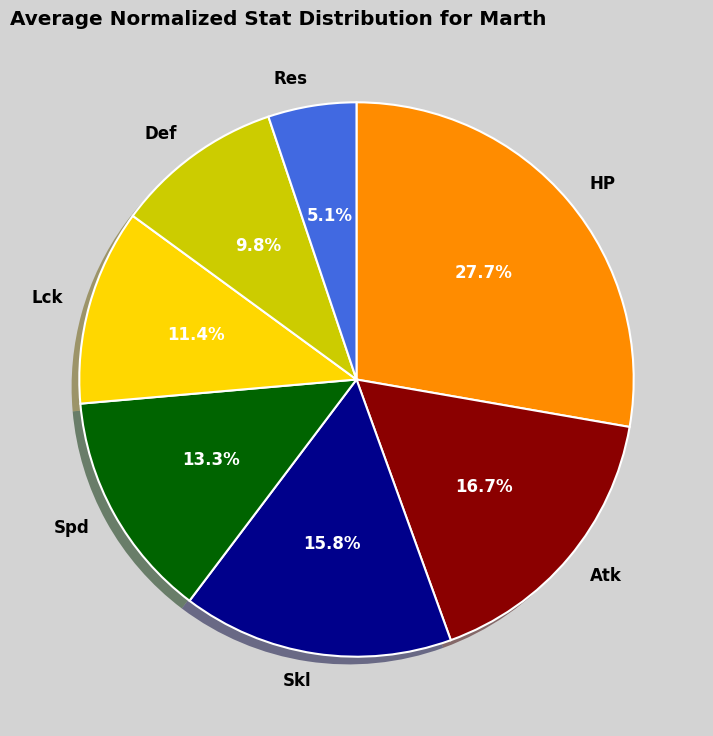

In [130]:
normalized_stat_tensor, ave_stat_tensor = normalize_stats(marth_stats_tensor)
ave_stat_tensor, indices = torch.sort(ave_stat_tensor, descending=True)
plot_ave_stat_distribution(ave_stat_tensor.cpu())


- From the resulting pie chart, the following can be surmised about Marth's typical stat line
    - Ignoring HP, Atk, Skl and Spd seem to be emphsized the most in the stat line
    - Res tends to be his weakest stat
    - Def and Res don't have a share above 10% unlike most of his stats